In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import scipy.stats as stat
import pylab
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

In [215]:
df = pd.read_csv('diabetes.csv')

In [216]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [218]:
df.duplicated().sum()

0

In [219]:
df[df['BloodPressure']<40].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
18,1,103,30,38,83,43.3,0.183,33,0
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0


In [220]:
d =df[df['Insulin']==0]
d[d['Outcome']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
12,10,139,80,0,0,27.1,1.441,57,0
...,...,...,...,...,...,...,...,...,...
756,7,137,90,41,0,32.0,0.391,39,0
758,1,106,76,0,0,37.5,0.197,26,0
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0


In [221]:
# d =df[df['Insulin']==0]
# k= d[d['Outcome']==0]
# ind =k.index[k['Glucose']>=125].tolist()
# for i in ind :
#     df.loc[i, 'Outcome'] = 1
df=df.drop(columns='Insulin',axis=1)

In [222]:
df[df['DiabetesPedigreeFunction']<=0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome


In [223]:
df[df['BloodPressure']==0].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,35.3,0.134,29,0
15,7,100,0,0,30.0,0.484,32,1
49,7,105,0,0,0.0,0.305,24,0
60,2,84,0,0,0.0,0.304,21,0
78,0,131,0,0,43.2,0.270,26,1


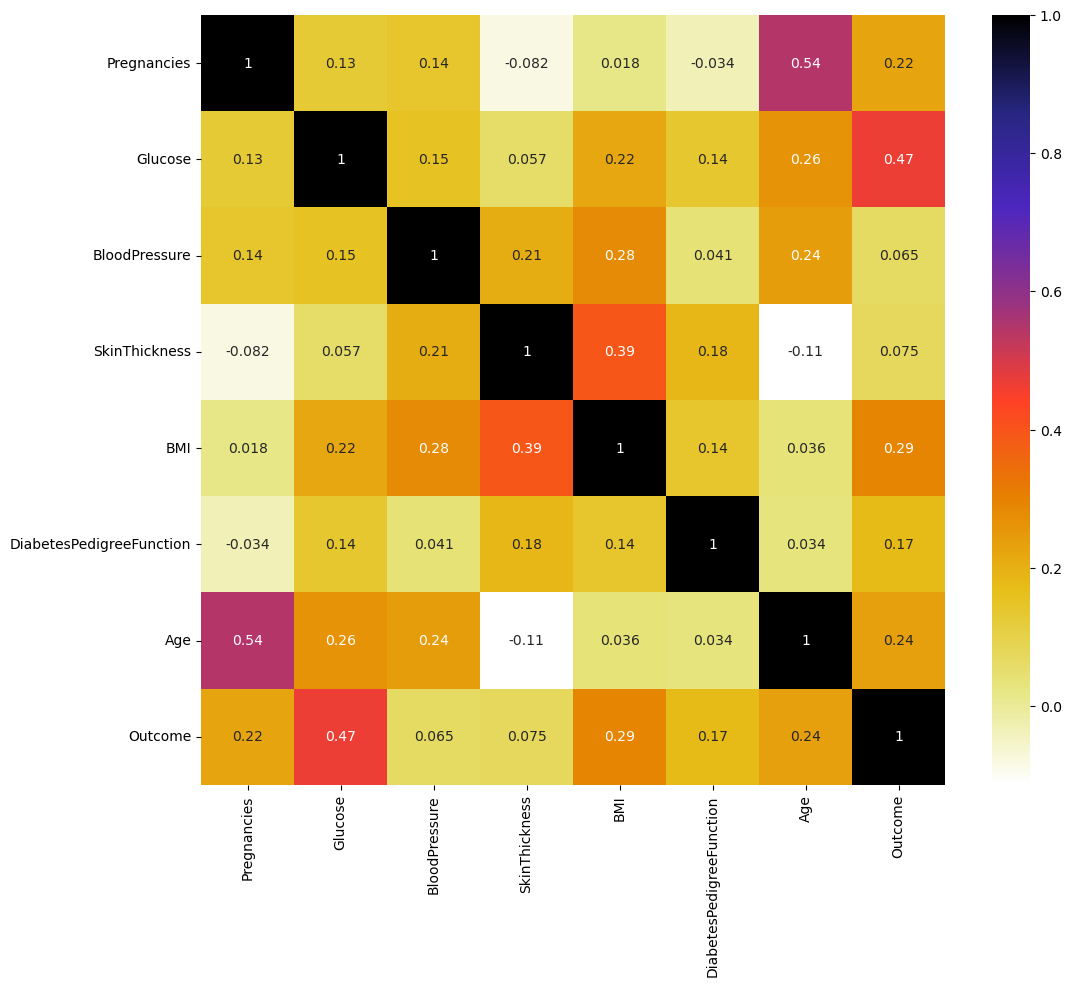

In [224]:
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr,annot = True,cmap=plt.cm.CMRmap_r)
plt.show()

In [225]:
# df = df.drop(columns=['SkinThickness','BloodPressure'],axis=1)
# df.head()

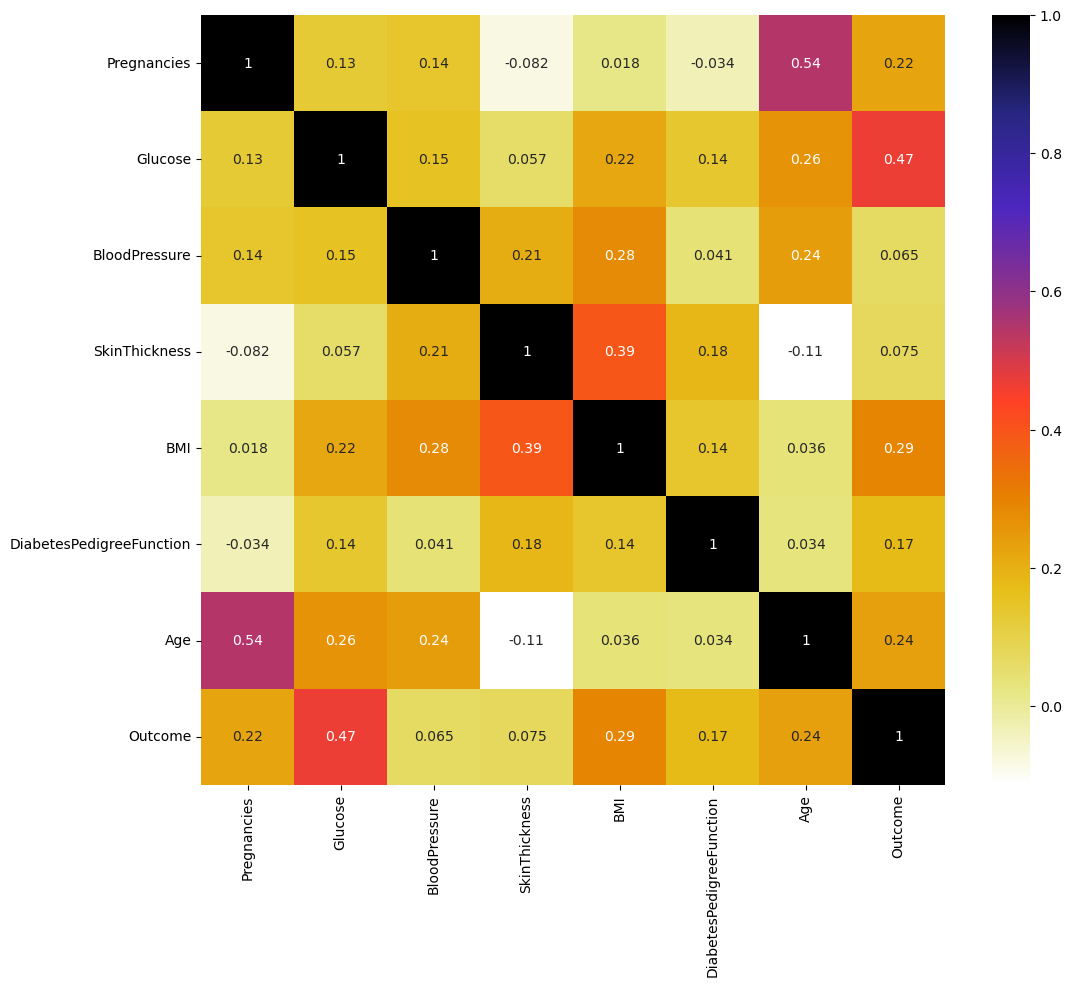

In [226]:
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr,annot = True,cmap=plt.cm.CMRmap_r)
plt.show()

In [227]:
cols=['Pregnancies','Glucose','BloodPressure','SkinThickness','BMI','DiabetesPedigreeFunction','Age','Outcome']

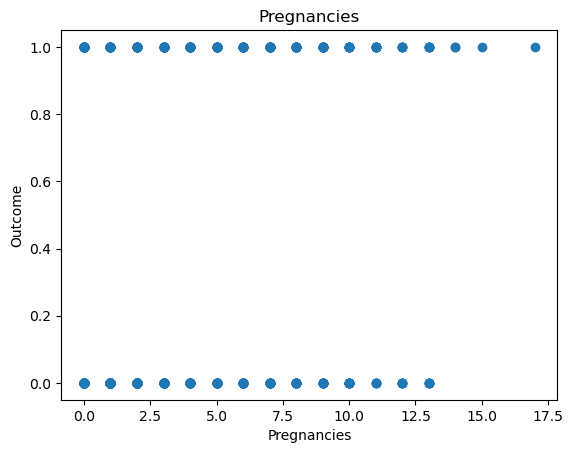

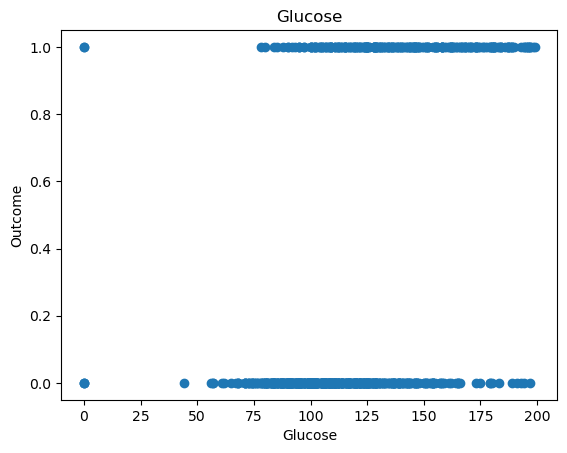

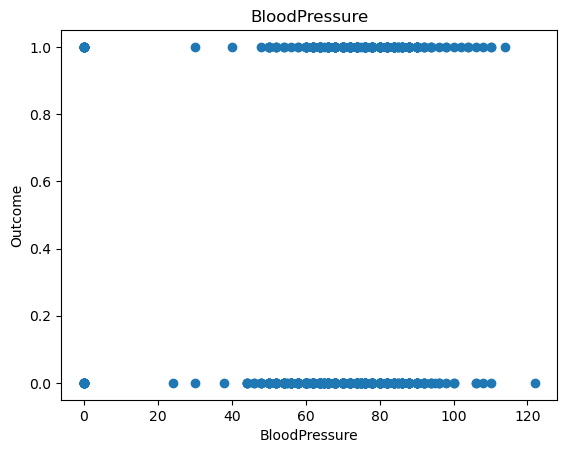

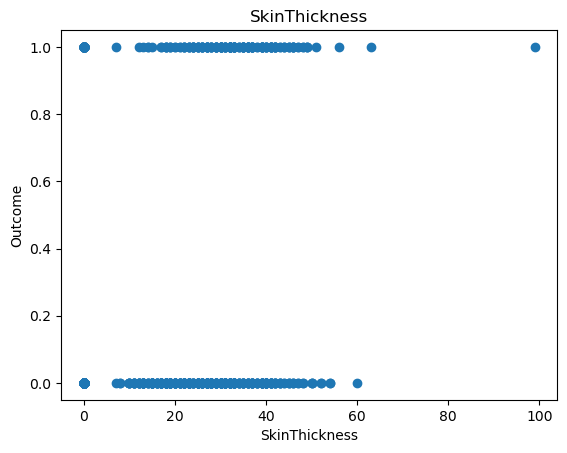

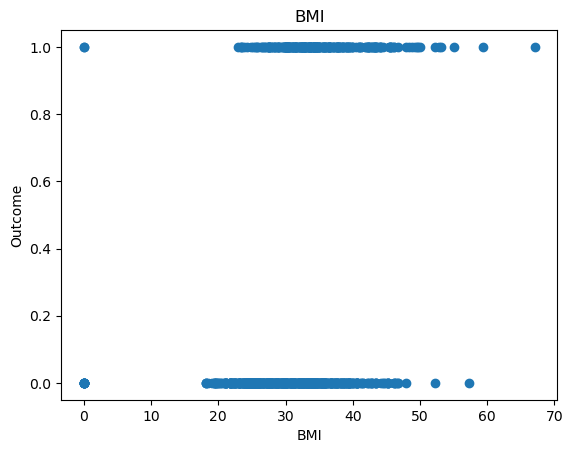

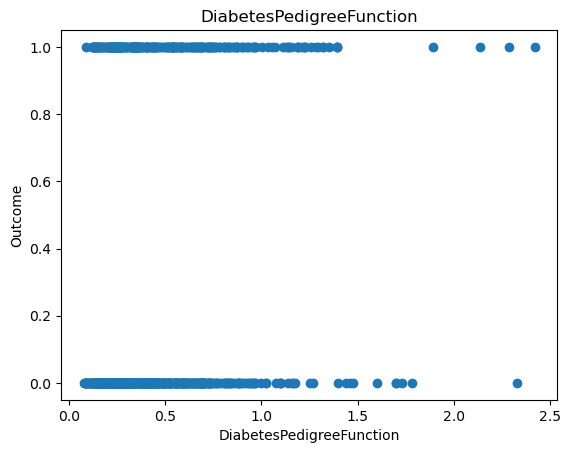

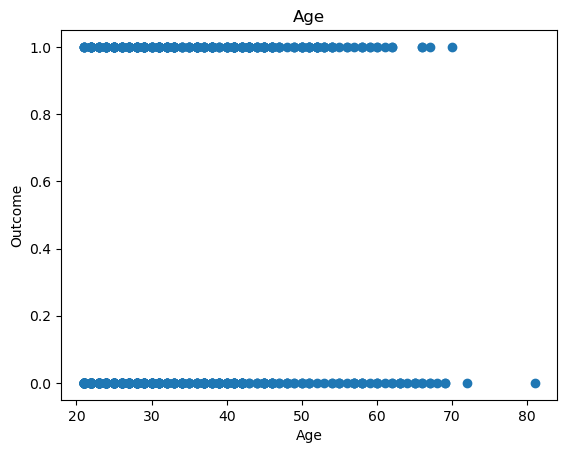

In [228]:
for label in cols[:-1]:
    plt.scatter(df[label],df['Outcome'])
    plt.title(label)
    plt.ylabel('Outcome')
    plt.xlabel(label)
    plt.show()

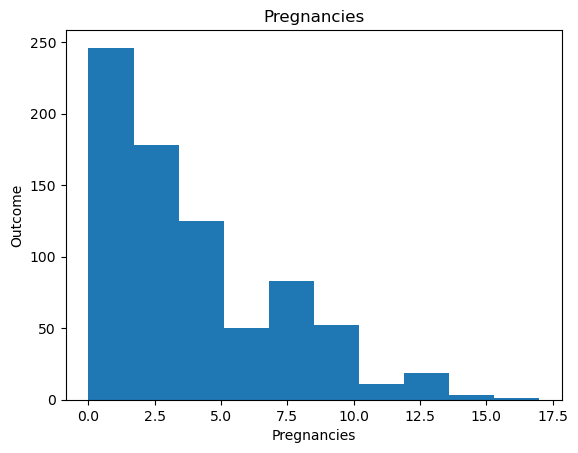

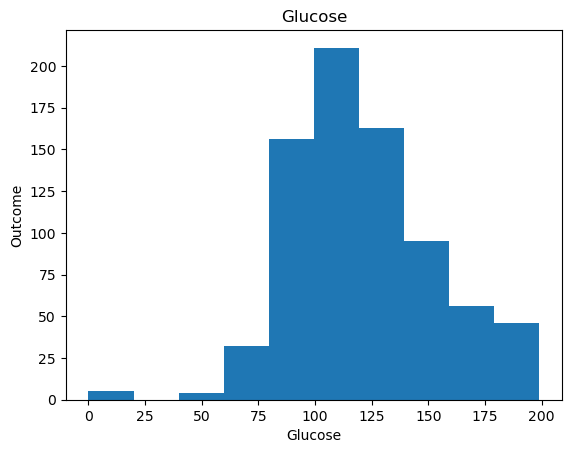

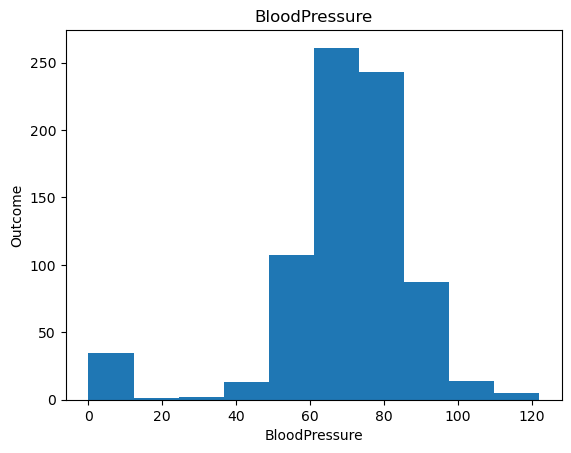

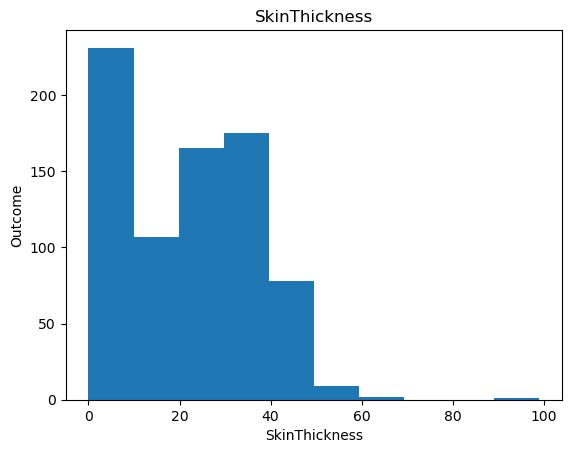

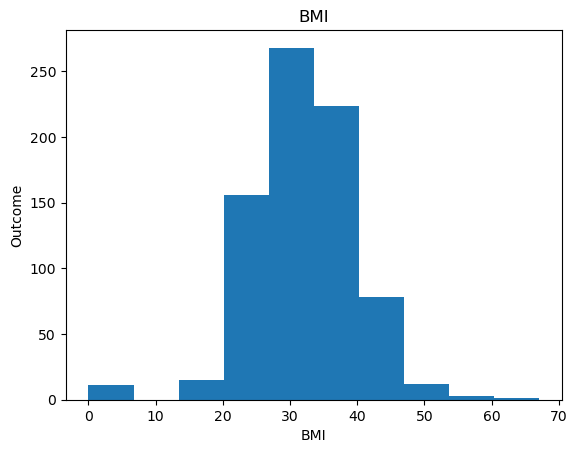

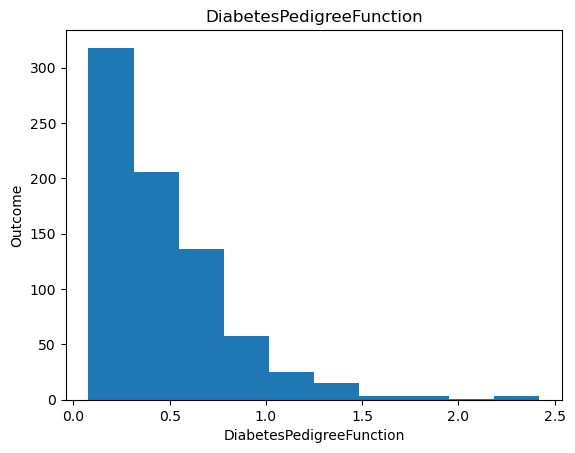

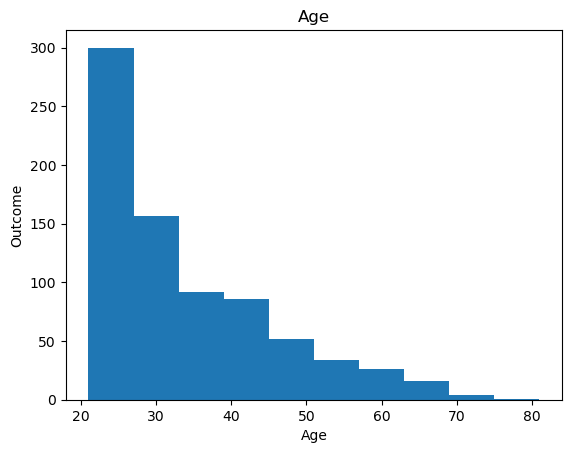

In [229]:
for label in cols[:-1]:
    plt.hist(df[label])
    plt.title(label)
    plt.ylabel('Outcome')
    plt.xlabel(label)
    plt.show()

In [230]:
p = df['BloodPressure'].unique()
k=[]
for i in range(len(p)):
    if p[i]<40 :
        k.append(p[i])

In [231]:
df['Pregnancies'].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

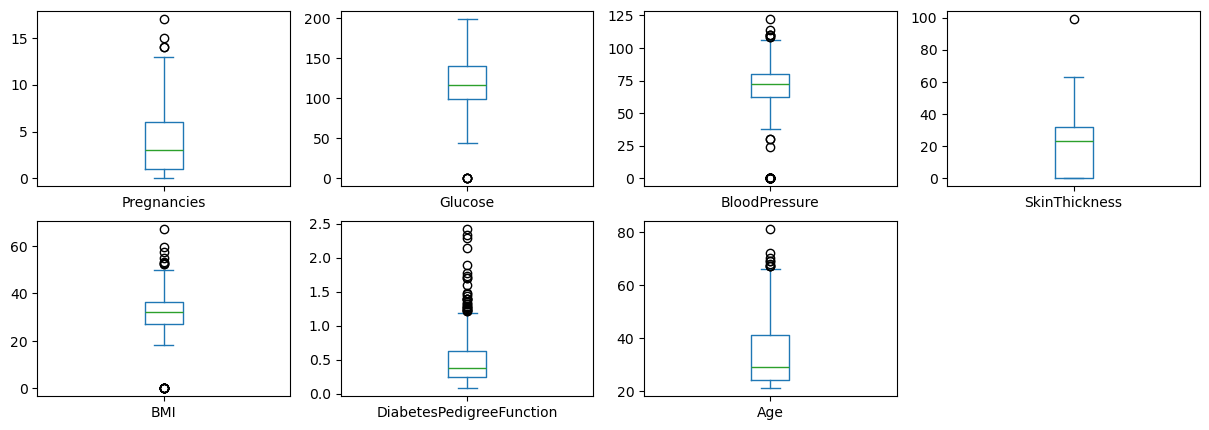

In [232]:
for i in range(1,8):
    plt.subplot(2, 4, i)
    df[cols[i-1]].plot.box(figsize=(15,5))

In [233]:
def clean_outlier(col,outlier,df ):
    for i in outlier :
        ind =df.index[df[col]==i].tolist()
        df=df.drop(index=ind,axis=0)
    return df

In [234]:
df = clean_outlier('Pregnancies',[14,15,17],df)
df = clean_outlier('Glucose',[0],df)
df = clean_outlier('BMI',[0],df)
df = clean_outlier('BloodPressure',k,df)
df = clean_outlier('SkinThickness',[100],df)

In [235]:
df = df.drop(columns=['SkinThickness','BloodPressure'],axis=1)
df.head()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,33.6,0.627,50,1
1,1,85,26.6,0.351,31,0
2,8,183,23.3,0.672,32,1
3,1,89,28.1,0.167,21,0
4,0,137,43.1,2.288,33,1


In [236]:
cols=['Pregnancies','Glucose','BMI','DiabetesPedigreeFunction','Age','Outcome']

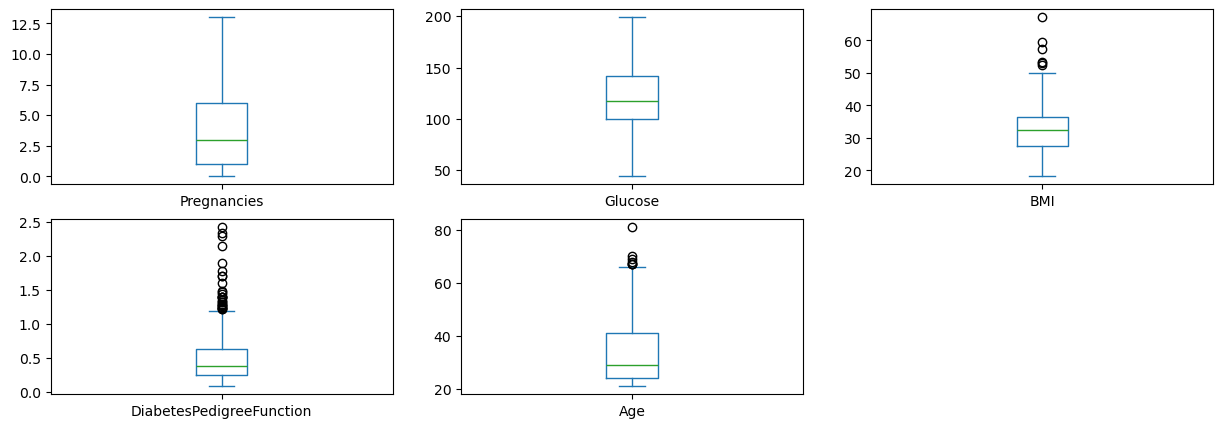

In [237]:
for i in range(1,6):
    plt.subplot(2, 3, i)
    df[cols[i-1]].plot.box(figsize=(15,5))

In [238]:
def plot_data(df,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.title('Histogram of '+feature)
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.title('Probability Plot of '+feature)
    plt.show()


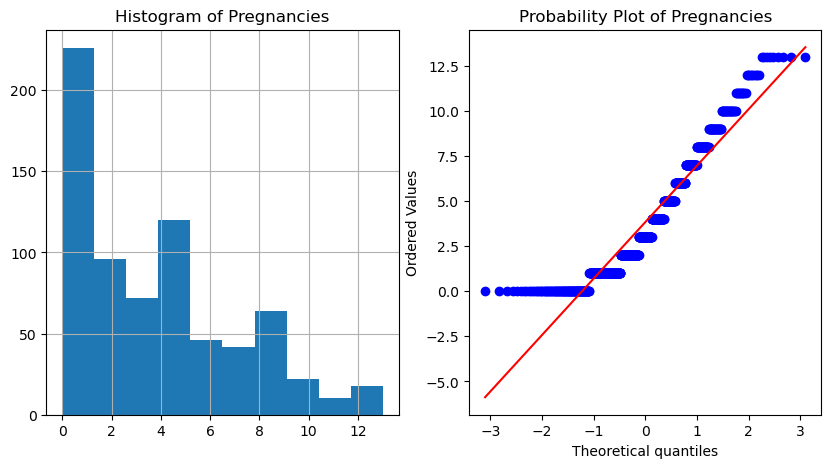

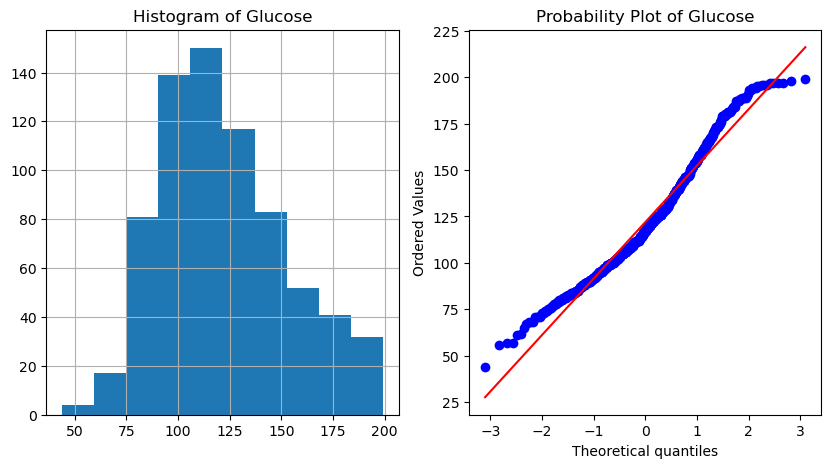

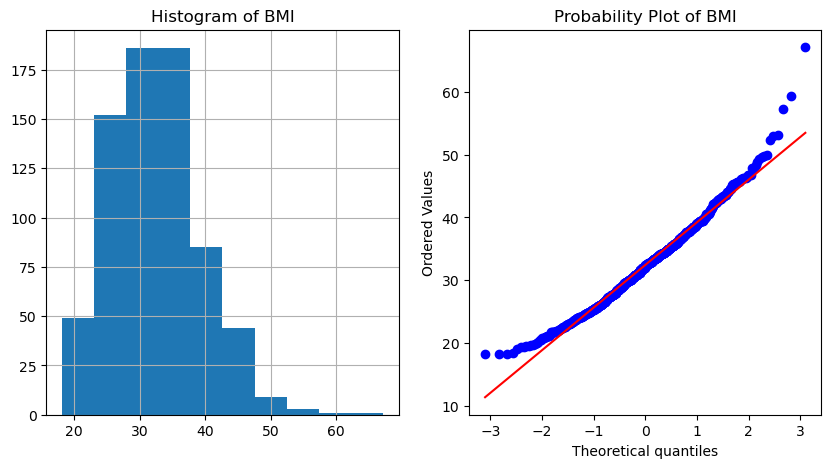

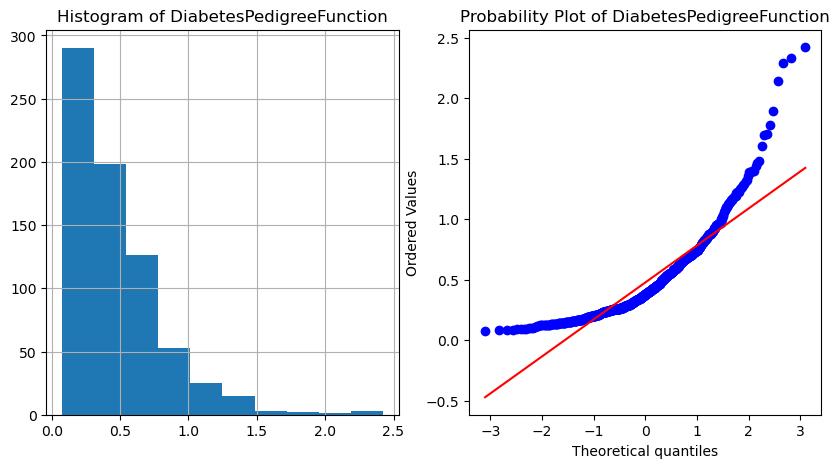

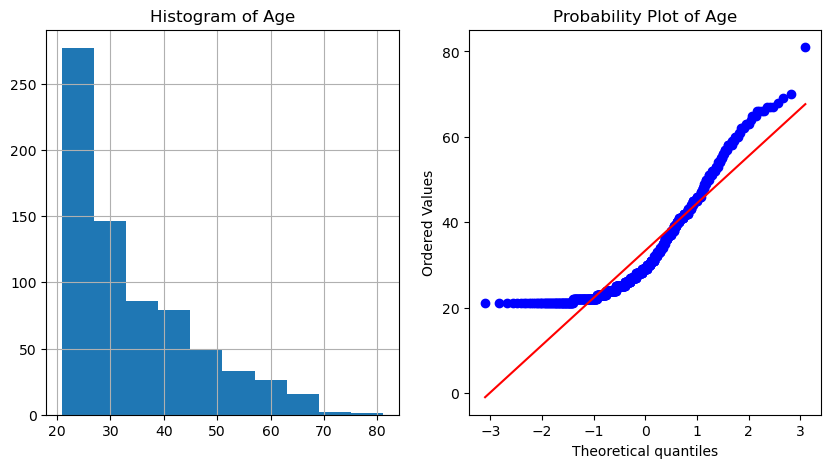

In [239]:
for label in cols[:-1]:
    plot_data(df,label)

In [240]:
data = df

In [241]:
data['Age'] = np.log(df['Age'])

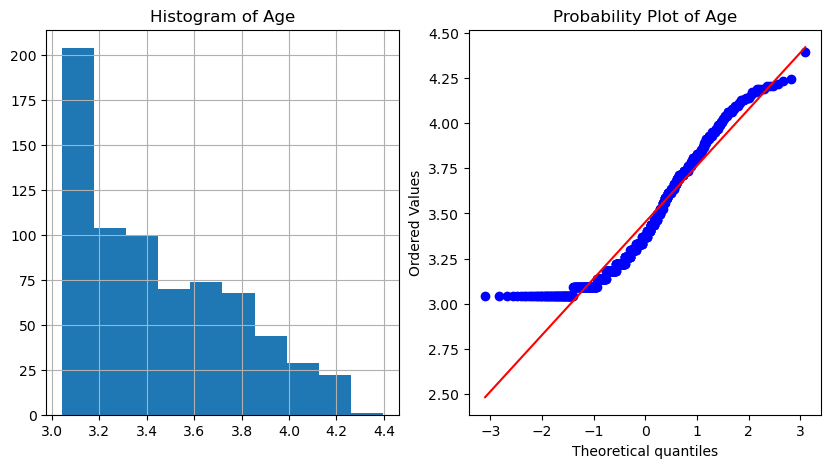

In [242]:
plot_data(data,'Age')

In [243]:
data['DiabetesPedigreeFunction'] = np.log(df['DiabetesPedigreeFunction'])

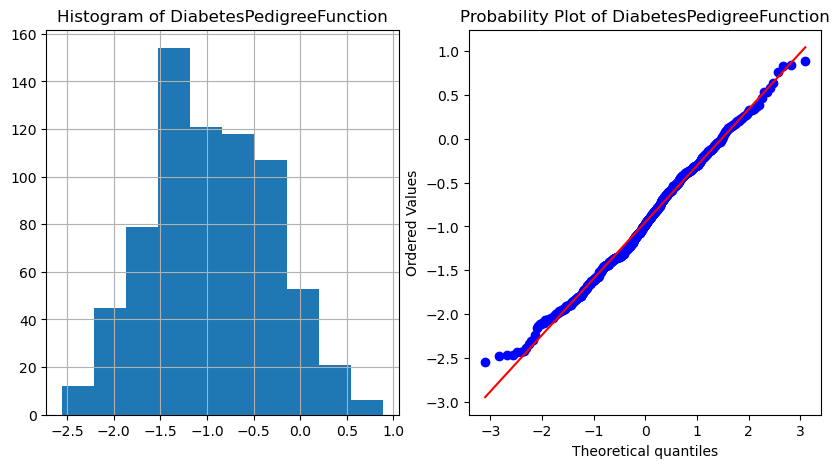

In [244]:
plot_data(data,'DiabetesPedigreeFunction')

In [245]:
data['BMI'] = np.log(df['BMI'])

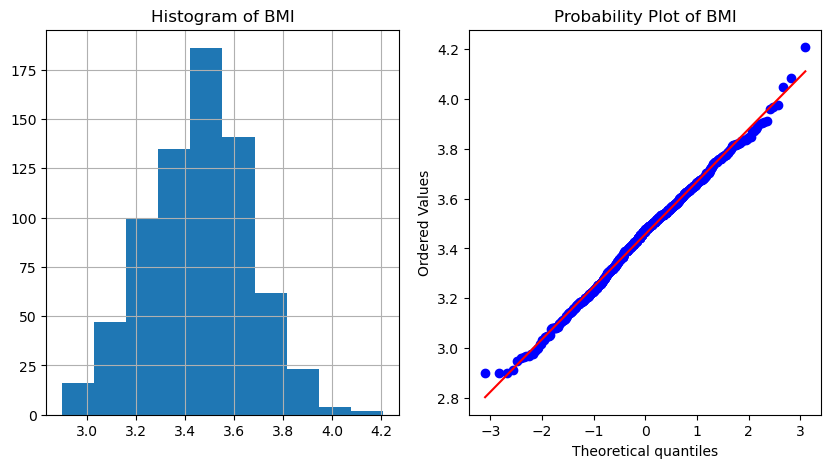

In [246]:
plot_data(data,'BMI')

In [247]:
data['Pregnancies'] = np.sqrt(df['Pregnancies'])

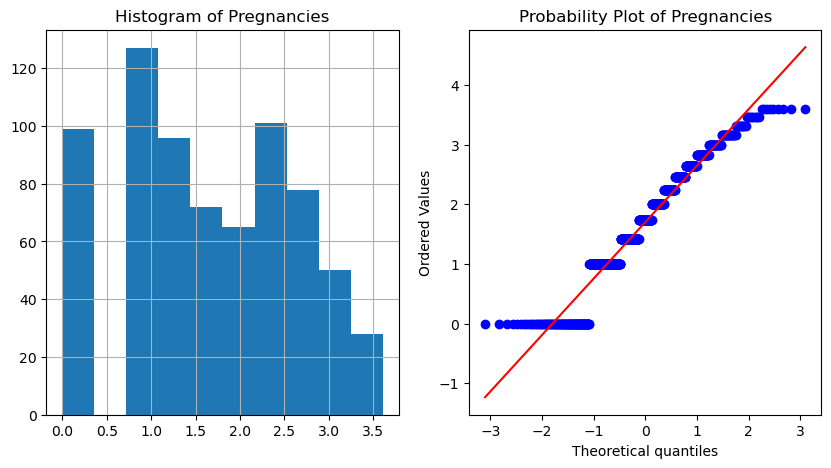

In [248]:
plot_data(data,'Pregnancies')

C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_33132\3709795234.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=data, palette = 'pastel')


<Axes: xlabel='Outcome', ylabel='count'>

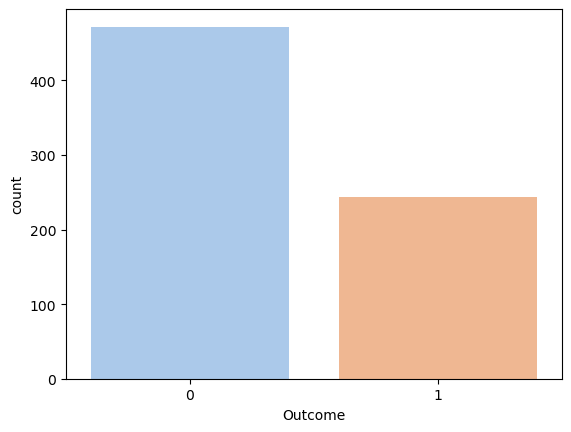

In [249]:
sns.countplot(x='Outcome', data=data, palette = 'pastel')

In [250]:
print(data.shape)
print(748/(0.3*748))

(716, 6)
3.333333333333333


In [251]:
data.head()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.449490,148,3.514526,-0.466809,3.912023,1
1,1.000000,85,3.280911,-1.046969,3.433987,0
2,2.828427,183,3.148453,-0.397497,3.465736,1
3,1.000000,89,3.335770,-1.789761,3.044522,0
4,0.000000,137,3.763523,0.827678,3.496508,1


In [252]:
def scale(df,oversample=False):
    x = df[df.columns[:-1]].values
    y = df[df.columns[-1]].values
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    if oversample:
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x,y)
    data = np.hstack([x,np.reshape(y,(-1,1))])
    return data , x, y

In [253]:
train,test = train_test_split(data,test_size=0.2,random_state=70)

In [254]:
train,x_train,y_train = scale(train,True)
test,x_test,y_test = scale(test,False)

In [255]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train,y_train)

In [256]:
y_pre = lg_model.predict(x_test)
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.87      0.71      0.78       101
           1       0.52      0.74      0.62        43

    accuracy                           0.72       144
   macro avg       0.70      0.73      0.70       144
weighted avg       0.77      0.72      0.73       144



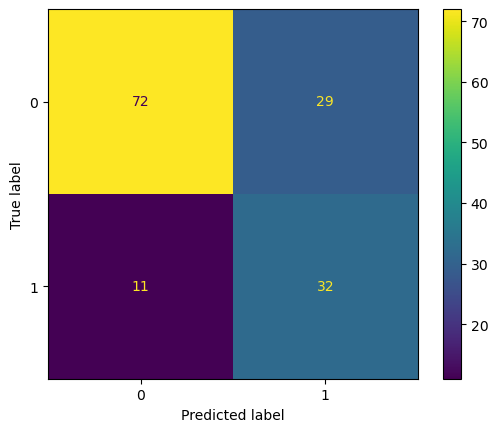

In [257]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pre)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

### **Tuning fo Logistic**

In [258]:


parameters = [
    {'solver': ['newton-cg', 'lbfgs', 'sag'], 
     'penalty': ['l2'], 
     'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    
    {'solver': ['liblinear'], 
     'penalty': ['l1', 'l2'], 
     'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    
    {'solver': ['saga'], 
     'penalty': ['elasticnet'], 
     'C': [0.001, 0.01, 0.1, 1, 10, 100], 
     'l1_ratio': [0.1, 0.5, 0.9]},
    
    {'solver': ['saga'], 
     'penalty': ['l1', 'l2'], 
     'C': [0.001, 0.01, 0.1, 1, 10, 100]},
]


lg = LogisticRegression()
grid_search = GridSearchCV(estimator = lg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)



# Fit the model
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

In [259]:
y_pre = lg_model.predict(x_test)
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.87      0.71      0.78       101
           1       0.52      0.74      0.62        43

    accuracy                           0.72       144
   macro avg       0.70      0.73      0.70       144
weighted avg       0.77      0.72      0.73       144



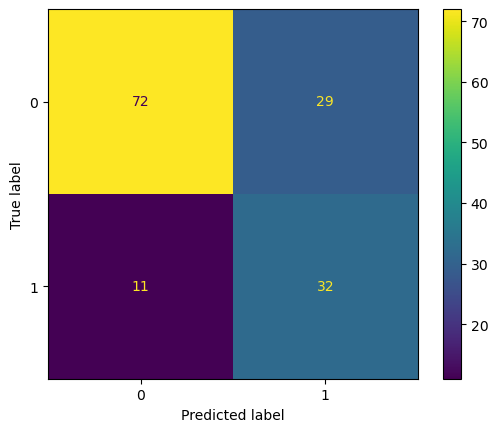

In [260]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pre)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [261]:
svm_model = SVC()
svm_model = svm_model.fit(x_train,y_train)

In [262]:
y_pre = svm_model.predict(x_test)
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.89      0.70      0.78       101
           1       0.53      0.79      0.64        43

    accuracy                           0.73       144
   macro avg       0.71      0.75      0.71       144
weighted avg       0.78      0.73      0.74       144



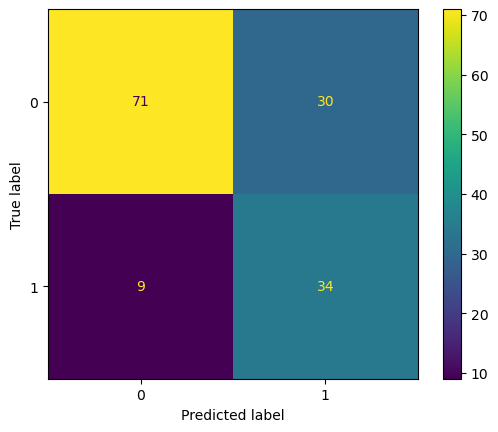

In [263]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pre)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

### **Tuning for SVMs**

In [264]:
parameters = {
    'C': [0.1, 1,20, 10],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf' and 'poly'
    'kernel': ['linear', 'rbf', 'poly']  # Different kernel types
}

svc = SVC()
grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)
# Fit the model
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [265]:
y_pre = grid_search.predict(x_test)
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79       101
           1       0.53      0.72      0.61        43

    accuracy                           0.73       144
   macro avg       0.70      0.73      0.70       144
weighted avg       0.76      0.73      0.74       144



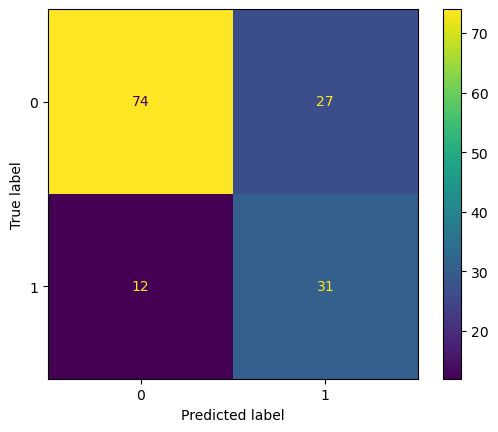

In [266]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pre)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [267]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train,y_train)

In [268]:
y_pre = nb_model.predict(x_test)
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79       101
           1       0.53      0.72      0.61        43

    accuracy                           0.73       144
   macro avg       0.70      0.73      0.70       144
weighted avg       0.76      0.73      0.74       144



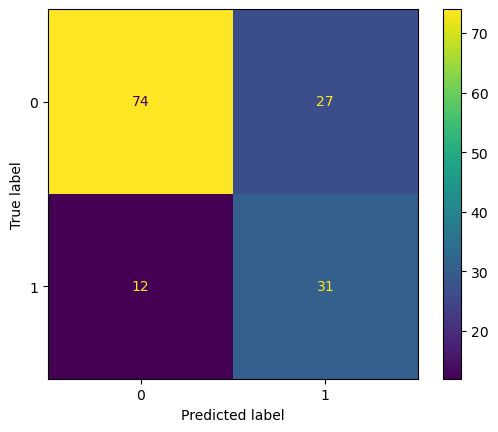

In [269]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pre)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

### **Tuning for GaussianNB**

In [270]:
parameters = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]  # The regularization term (for smoothing the variance)
    
}

nb_model = GaussianNB()
grid_search = GridSearchCV(estimator = nb_model,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)
# Fit the model
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'var_smoothing': 1e-09}

In [271]:
y_pre = grid_search.predict(x_test)
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79       101
           1       0.53      0.72      0.61        43

    accuracy                           0.73       144
   macro avg       0.70      0.73      0.70       144
weighted avg       0.76      0.73      0.74       144



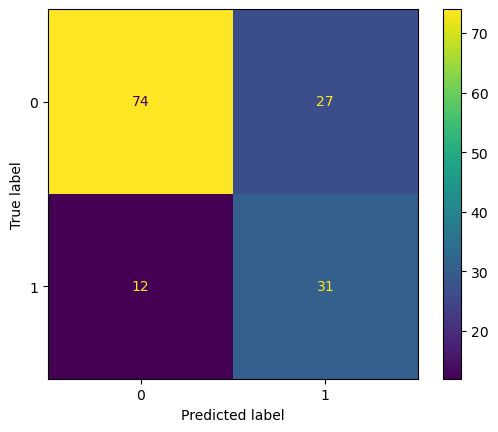

In [272]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pre)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [273]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [274]:
mnb = MultinomialNB()
mnb.fit(x_train_scaled, y_train)

MultinomialNB()

In [275]:
y_pre = mnb.predict(x_test_scaled)
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.77      0.60      0.68       101
           1       0.38      0.58      0.46        43

    accuracy                           0.60       144
   macro avg       0.58      0.59      0.57       144
weighted avg       0.66      0.60      0.61       144



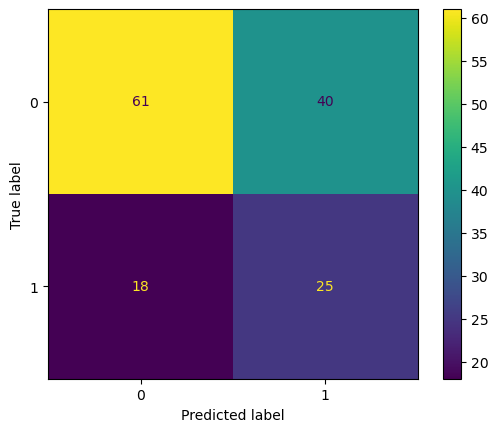

In [276]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pre)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [277]:
parameters = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0],  # Smoothing parameter
    'fit_prior': [True, False]           # Learn class prior probabilities
}
mnbs = MultinomialNB()
grid_search = GridSearchCV(estimator = mnbs,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)
grid_search.fit(x_train_scaled, y_train)
grid_search.best_params_

{'alpha': 0.1, 'fit_prior': True}

In [278]:
y_pre = grid_search.predict(x_test_scaled)
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.77      0.60      0.68       101
           1       0.38      0.58      0.46        43

    accuracy                           0.60       144
   macro avg       0.58      0.59      0.57       144
weighted avg       0.66      0.60      0.61       144



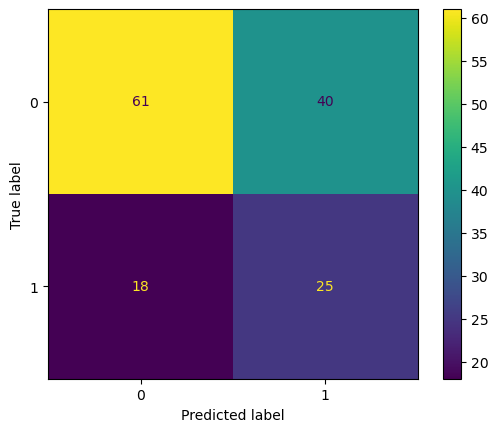

In [279]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pre)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [280]:
rf_model = RandomForestClassifier(criterion='gini',
                                  max_depth=8,
                                  min_samples_split=10)
rf_model.fit(x_train, y_train)
y_pre = grid_search.predict(x_test)
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.79      0.58      0.67       101
           1       0.39      0.63      0.48        43

    accuracy                           0.60       144
   macro avg       0.59      0.61      0.58       144
weighted avg       0.67      0.60      0.61       144



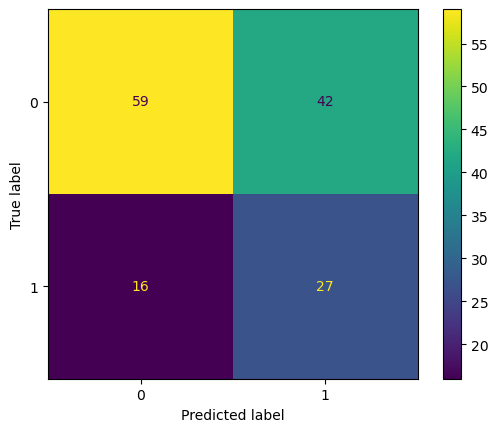

In [281]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pre)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

# **Random Forest + Turning**

In [ ]:

parameters = {
    'n_estimators': [10, 50, 100, 200],        # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],           # Maximum depth of the tree
    'min_samples_split': [2, 5],           # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],             # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None],     # Number of features to consider at each split
    'bootstrap': [True, False]              # Whether to use bootstrap sampling or not
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)
grid_search.fit(x_train, y_train)
grid_search.best_params_


In [625]:
y_pre = grid_search.predict(x_test)
print(classification_report(y_test,y_pre))
# print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       101
           1       0.62      0.67      0.64        43

    accuracy                           0.78       144
   macro avg       0.74      0.75      0.74       144
weighted avg       0.78      0.78      0.78       144



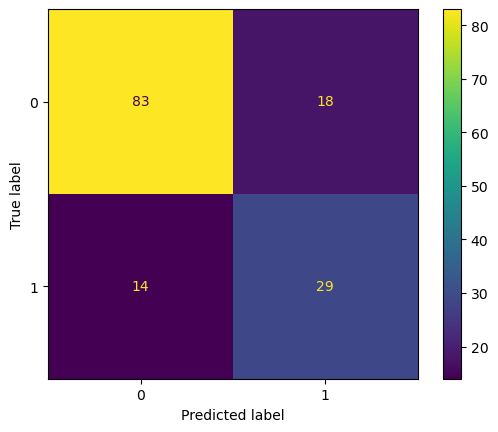

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pre)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()